<a href="https://colab.research.google.com/github/killicy/MachineLearningData/blob/master/Homework_1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/killicy/MachineLearningData/master/train.csv'
url2 = 'https://raw.githubusercontent.com/killicy/MachineLearningData/master/test.csv'
train_set = pd.read_csv(url, error_bad_lines=False)
test_set = pd.read_csv(url2, error_bad_lines=False)

#Q6


In [2]:
print(train_set.columns.values)
train_set.info()

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#Q7/Q8



In [3]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_set.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Wiseman, Mr. Phillippe",male,347082,B96 B98,S
freq,1,577,7,4,644


#Q9


In [5]:
train_set[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


#Q10

In [6]:
train_set[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


#Q11

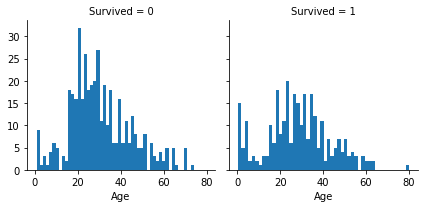

In [7]:
ageVsurvival = sns.FacetGrid(train_set, col='Survived')
ageVsurvival.map(plt.hist, 'Age', bins=50)

#Q12

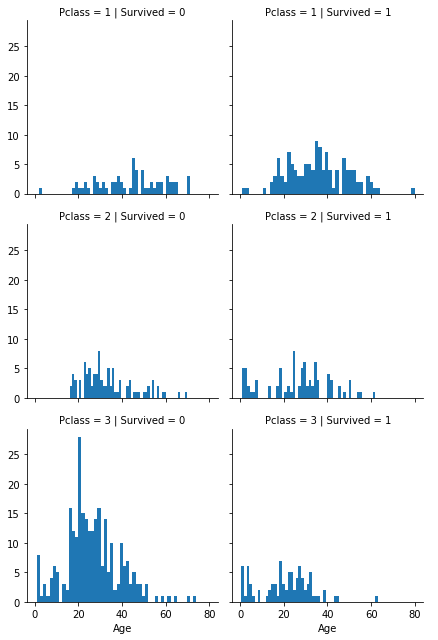

In [8]:
grid = sns.FacetGrid(train_set, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', bins=50)
grid.add_legend();

#Q13

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


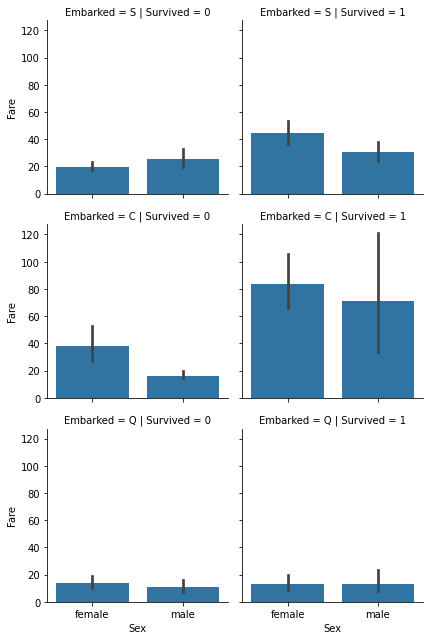

In [9]:
grid = sns.FacetGrid(train_set, row='Embarked', col='Survived')
grid.map(sns.barplot, 'Sex', 'Fare')
grid.add_legend()

#Q14

In [10]:
train_set[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Ticket,Survived
0,110152,1.0
180,26360,1.0
483,386525,1.0
479,382651,1.0
151,244373,1.0
...,...,...
385,349246,0.0
384,349245,0.0
197,2669,0.0
382,349243,0.0


#Q15

In [11]:
null_cabin = train_set.columns[train_set.isnull().any()]
train_set[null_cabin].isnull().sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

In [12]:
train_set = train_set.drop(['Ticket', 'Cabin'], axis=1)

#Q16

In [13]:
train_set['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [14]:
gender = {'male': 0, 'female': 1}
train_set['Sex'] = [gender[item] for item in train_set['Sex']]

train_set['Sex'].head()


0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

#Q17


In [15]:
print(train_set['Age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [16]:
age_avg = train_set['Age'].mean()
age_std = train_set['Age'].std()
age_null_count = train_set['Age'].isnull().sum()

i = 0
for dataset in train_set['Age']:
  if np.isnan(dataset):
    dataset = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset = np.average(dataset) 
    dataset = dataset.astype(int) 
    train_set.loc[i, 'Age'] = dataset
  i += 1 

print(train_set['Age'].head)         

<bound method NDFrame.head of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    27.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>


#Q18


In [17]:
train_set['Embarked'].fillna('S')
  

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

#Q19

In [18]:
print(train_set['Fare'].value_counts())
train_set['Fare'].fillna(8.05)

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64


0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

#Q20


In [19]:
i = 0
for dataset in train_set['Fare']:
  int(dataset)
  if dataset <= 7.91:
    train_set.loc[i, 'Fareband'] = 0
  elif dataset <= 14.454:
    train_set.loc[i, 'Fareband'] = 1
  elif dataset <= 31.0:
    train_set.loc[i, 'Fareband'] = 2
  else:
    train_set.loc[i, 'Fareband'] = 3
  i += 1

train_set['Fareband'] = train_set['Fareband'].astype(int)
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Fareband
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,1
